# SEGMENTATION DATA PREPROCESSING

### Imports

In [1]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import cv2

### Define directiories

In [ ]:
images_dir = "data/seg/images"
masks_dir = "data/seg/masks"
train_images_dir = "data/seg/train/images"
train_masks_dir = "data/seg/train/masks"
val_images_dir = "data/seg/val/images"
val_masks_dir = "data/seg/val/masks"

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_masks_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_masks_dir, exist_ok=True)

### Identify unpaired files

In [3]:
image_files = set(os.listdir(images_dir))
mask_files = set(os.listdir(masks_dir))

image_bases = {os.path.splitext(f)[0] for f in image_files}
mask_bases = {os.path.splitext(f)[0].replace("-mask", "") for f in mask_files}

images_to_delete = {f for f in image_files if os.path.splitext(f)[0] not in mask_bases}
masks_to_delete = {f for f in mask_files if os.path.splitext(f)[0].replace("-mask", "") not in image_bases}

### Delete unpaired files

In [4]:
for file in images_to_delete:
    os.remove(os.path.join(images_dir, file))
for file in masks_to_delete:
    os.remove(os.path.join(masks_dir, file))

### Check for equal number of images and masks

In [5]:
image_files = sorted(os.listdir(images_dir))
mask_files = sorted(os.listdir(masks_dir))

assert len(image_files) == len(mask_files), "Mismatch between images and masks!"

### Display one sample image and mask

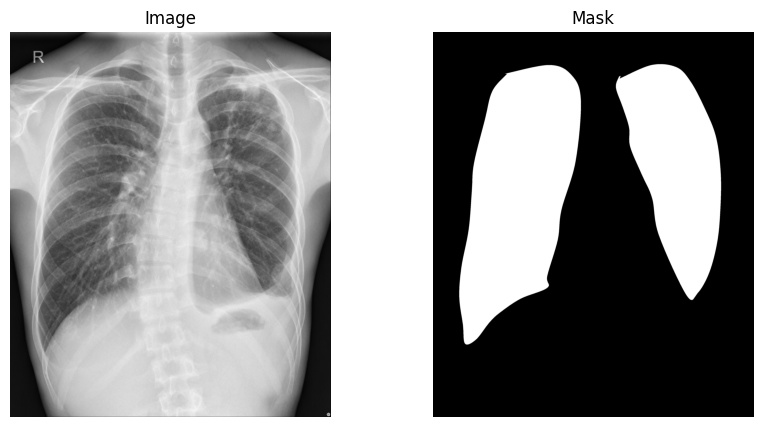

In [6]:
sample_image = image_files[0]
sample_mask = sample_image.replace(".png", "-mask.png")

image = cv2.imread(os.path.join(images_dir, sample_image), cv2.IMREAD_COLOR)
mask = cv2.imread(os.path.join(masks_dir, sample_mask), cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
plt.title("Mask")
plt.axis("off")

plt.show()

### Split for training and validation

In [7]:
paired_files = [(img, img.replace(".png", "-mask.png")) for img in image_files]
random.shuffle(paired_files)
split_idx = int(0.8 * len(paired_files))

train_files = paired_files[:split_idx]
val_files = paired_files[split_idx:]

for img, msk in train_files:
    shutil.move(os.path.join(images_dir, img), os.path.join(train_images_dir, img))
    shutil.move(os.path.join(masks_dir, msk), os.path.join(train_masks_dir, msk))

for img, msk in val_files:
    shutil.move(os.path.join(images_dir, img), os.path.join(val_images_dir, img))
    shutil.move(os.path.join(masks_dir, msk), os.path.join(val_masks_dir, msk))

print(f"Training set: {len(os.listdir(train_images_dir))} images, {len(os.listdir(train_masks_dir))} masks")
print(f"Validation set: {len(os.listdir(val_images_dir))} images, {len(os.listdir(val_masks_dir))} masks")

Training set: 563 images, 563 masks
Validation set: 141 images, 141 masks
